## Artificial Intelligence - Computer Assignment 01: Genetic Algorithms
### Problem Description
In this assignment we're going to solve the knapsack problem using a genetic algorithm.
In the problem we're given data of some snacks. The data includes available weight and vlaue of each snack. We should pick an amount of each snack and the goal is that the sum of vlaues get greater than the given value. There is also three limitations. Weight of all the picked snacks should be smaller than a given weight, we can't pick more than a snack's available weight and number of snacks that we pick should be in a given range.

### DataFrame and Hyperparameters

I read snacks' data from the given csv file and store them in a dataframe. It includes the name of each snack, its availavle weight and its value.<br>I use a dataclass to sotre the problem hyperparameters. I determine them in the last part where I want to get input. These parameters can be changed due to our strategy for solving the problem.

In [1]:
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass


data_frame = pd.read_csv('snacks.csv')
snacks = data_frame['Snack'].tolist()
weights = data_frame['Available Weight']
values = data_frame['Value']
num_of_snacks = len(snacks)


@dataclass
class Hyperparameter:
    population_size: int
    number_of_generations: int
    selection_rate : int
    p_crossover : int
    p_mutation : int

### Genetic Representation and Fitness Function
We should define genes and chromosomes. Therefor I make a chromosome class. Each chromosome would be a list of genes and its length(number of genes) would be the number of snacks. I define each gene as a number between 0 and 1 which represents the portion of weight and how much I pick from each snack. For example if the gene's number is 0 it means that I've taken nothing from that specific snack and if the gene's number is 0.5 it means that I've taken half of the snack related to that gene.<br> Then I define chromosome's fitness as a method of Chromosome class. Fitness would be 0 if the sum of snacks that i pick get above the given maximum weight or the number of snacks that i pick get out of the given range. Otherwise it would be the sum of values of snacks that I pick, divided by the given minimum value. If the fitness is 1 it means that the sum of values of snacks we picked is exactly equal to the given minimum value and if it's bigger than one it means that the sum of values of snacks we picked is bigger than the given minimum value and therefore that chromosome can be a solution to our problem. The goal is to reach the fitness bigger or equal to 1.


$$
fitness = 
\begin{cases}
0&\:\:\:if\:\:\:\displaystyle\sum_{i=1} ^{chromosome\underline{}length}g_iw_i>max\underline{}weight\:\:\:or\:\:\:|g_i>0|<min\underline{}snacks\:\:\:or\:\:\:|g_i>0|<max\underline{}snack\\
\frac{\displaystyle\sum_{i=1} ^{chromosome\underline{}length}g_iv_i}{min\underline{}value}&\:\:\:otherwise\\
\end{cases}\\
g_i=ith\:gene\\
w_i=ith\:snack's\:weight\\
v_i=ith\:snack's\:value
$$

In [2]:
 class Chromosome:
    def __init__(self):
        self.size = num_of_snacks
        self.genes = []
        for i in range(self.size):
            self.genes.append(0)
        num_of_genes = random.randint(min_snacks, max_snacks)
        for _ in range(num_of_genes):
            index = random.randint(0, self.size - 1)
            self.genes[index] = round(random.random(), 2)
            while self.genes[index] == 0:
                self.genes[index] = round(random.random(), 2)
                
    def get_fitness(self):
        value_sum = 0
        weight_sum = 0
        num_snacks_picked = 0
        for i in range(self.size):
            if self.genes[i] > 0:
                num_snacks_picked += 1
                if num_snacks_picked > max_snacks:
                    return 0
                weight_sum += self.genes[i] * weights[i]
                value_sum += self.genes[i] * values[i]
        if num_snacks_picked < min_snacks:
            return 0
        elif weight_sum > max_weight:
            return 0
        else:
            fitness = value_sum / min_value
            return round(fitness, 2)

### Initial Population
Here I define initial population class. It's basicly a list of chromosomes. Length of its list is a parameter which we can change. 

In [3]:
class Initial_Population:
    def __init__(self, hyperparamter):
        self.size = hyperparameter.population_size
        self.chromosomes = []
        for _ in range(self.size):
            chromosome = Chromosome()
            self.chromosomes.append(chromosome)

### Genetic Algorithm (Selection, Crossover and Mutation)
This is the main class and almost every function take place in it. It gets an initial population as input and its size would be the initial population's size.<br>I explain each method of class seperately.
- `get_best_chromosome`:<br>
It takes a list of chromosomes and return the fittest one.
#### Selection
- `select_best_chromosomes`:<br>
In the selection part, before I select a population for crossover and mutation, I select a number of fitttest chromosomes and copy them directly to the next generation's population. In this way I keep and maintain the best chromosomes in each generation. 
- `ranked_selection`:<br>
I use rank-based selection to select chromosomes for the crossover and mutation. First I sort the population by fitness and give each chromosome a weight bt its rank. Then I select randomly from the population with a probability based on each chromosome's weight.
#### Crossover
- `crossover`:<br>
For every two chromosome of the population, with the chance of p_crossover which is a parameter and can be changed, I do a crossover. I use one-point crossover and I choose the crossover point randomly. Then I cross over two genes which are parents and two children will be produced.
#### Mutation
- `Mutation`:<br>
For each chromosome in the population, with the chance of p_mutation which is also a parameter, I do mutation. I randomly choose a gene and turn it to 0 if it's a number bigger than 0, and turn it to random number between 0 and 1 if it's 0.
* `print_poulation`:
This method is to print and show the entire population's chromosomes and their fitnesses, the average fitness of the population and also the best fitness in the population. Because of the long output, I've commented print_poulation in the run method. 
* `visualize_data`:
I use matplotlib library to show the diagram of the algorithm. It shows the progress of the average fitness and the best chromosome's fitness through each generation.
* `run`:
In this method I run the algorithm for a specific number of times which is a parameter and shows the number of generations. average_fitness_list and best_fitness_list are two lists to store each generation's best and average fitnesses for the data diagram and they will be passed as a parameter to visualize_data function. I should also note it again tha I've commented the print_population function to avoid long output. Instead I print the last generation's chromosomes. Then I show the diagram and at the end I print the solution which is a number of snacks and the their weight whcich we can pick to solve the problem. 

In [4]:
class Genetic_Algorithm:
    def __init__(self, initial_population):
        self.population = initial_population.chromosomes
        self.population_size = initial_population.size
        
        
    def get_best_chromosome(self, chromosomes):
        best_chromosome = chromosomes[0]
        best_fitness = best_chromosome.get_fitness()
        for chromosome in chromosomes:
            if chromosome.get_fitness() > best_fitness:
                best_fitness = chromosome.get_fitness()
                best_chromosome = chromosome
        return best_chromosome
    
    
    def select_best_chromosomes(self):
        sorted_population = sorted(self.population, reverse=True, key = lambda chromosome: chromosome.get_fitness())
        selection_rate = hyperparameter.selection_rate
        num_to_select = int(selection_rate * self.population_size)
        return copy.deepcopy(sorted_population[:num_to_select])
    
        
    def ranked_selection(self):
        sorted_population = sorted(self.population, reverse=False, key = lambda chromosome: chromosome.get_fitness())
        rank_list = [i + 1 for i in range(self.population_size)]
        selection_pool = random.choices(sorted_population, rank_list, k = self.population_size)
        return selection_pool

        
    def crossover(self, parents):
        chromosome_size = self.population[0].size
        for i in range(len(parents) // 2):
            if random.random() < hyperparameter.p_crossover:
                crossover_point = random.randint(1, chromosome_size - 1)
                first_child = parents[2 * i].genes[:crossover_point] + parents[2 * i + 1].genes[crossover_point:]
                second_child = parents[2 * i + 1].genes[:crossover_point] + parents[2 * i].genes[crossover_point:]
                parents[2 * i].genes = first_child
                parents[2 * i + 1].genes = second_child 
        return parents
    
            
    def mutation(self, children):
        chromosome_size = self.population[0].size
        for i in range(len(children)):
            if random.random() < hyperparameter.p_mutation:
                index = random.randint(0, chromosome_size - 1)
                if children[i].genes[index] == 0:
                    children[i].genes[index] = round(random.random(), 2)
                else:
                    children[i].genes[index] = 0
        return children
                
        
    def print_population(self, generation_number):
        sum = 0
        for i in range(self.population_size):
            sum += self.population[i].get_fitness()
        average_fitness = round(sum / self.population_size, 2)
        print("Genereation num:", generation_number)
        print("Average Fitness:", average_fitness)
        print("Best Fitness:", self.get_best_chromosome(self.population).get_fitness())
        num = 0
        for chromosome in self.population:
            num += 1
            print("Chromosome num:", num, "|", chromosome.genes, "| Fitness:", chromosome.get_fitness())
        print("-------------------------------------------------------")
        
    def visulaize_data(self, average_fitness, best_fitness):
        plt.title("Fitness through the generations")
        plt.xlabel("Genreation")
        plt.ylabel("Fitness")
        plt.plot(best_fitness, label = "Best Fitness")
        plt.plot(average_fitness, label = "Avereage Fitness")
        plt.legend()
        plt.show()
        
    def run(self):
        average_fitness_list = []
        best_fitness_list = []
        for generation_num in range(hyperparameter.number_of_generations):
            best_chromosomes = self.select_best_chromosomes()
            parents = self.ranked_selection()
            children = self.crossover(parents)
            mutants = self.mutation(children)
            best_chromosomes_num = int(hyperparameter.selection_rate * self.population_size)
            self.population = mutants[:(self.population_size - best_chromosomes_num)] + best_chromosomes
            # self.print_population(generation_num + 1)
            
            best_fitness_list.append(self.get_best_chromosome(self.population).get_fitness())
            sum = 0
            for i in range(self.population_size):
                sum += self.population[i].get_fitness()
            average_fitness_list.append(round(sum / self.population_size, 2))
        
        
        print("## Printing the last generation ##")
        self.print_population(hyperparameter.number_of_generations)   
        self.visulaize_data(average_fitness_list, best_fitness_list)
        best_chromosme_found = self.get_best_chromosome(self.population)
        print("Best chromosome found:", best_chromosme_found.genes, "| Fitness:", best_chromosme_found.get_fitness())
        print("-------------------------------------------------------")
        print("Output:\n")
        for i in range(len(best_chromosme_found.genes)):
            if best_chromosme_found.genes[i] > 0:
                print(snacks[i] + ":", round(best_chromosme_found.genes[i] * weights[i], 1))

### running an example:
Here I've determined each parameter and the problem's inputs. Then I've made an initial popualtion and run the algorithm on it.

## Printing the last generation ##
Genereation num: 100
Average Fitness: 1.59
Best Fitness: 1.64
Chromosome num: 1 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 2 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 3 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 4 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 5 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 6 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 7 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 8 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
Chromosome num: 9 | [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

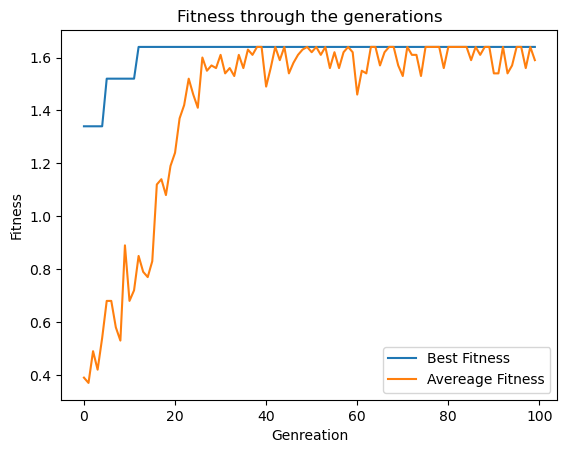

Best chromosome found: [0, 0, 0, 0.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0, 0.33, 0.07, 0] | Fitness: 1.64
-------------------------------------------------------
Output:

Jooj: 4.3
Pastil: 2.7
Ghottab: 2.3
Saghe-Talaei: 0.6


In [5]:
hyperparameter = Hyperparameter(
    population_size = 100,
    number_of_generations = 100,
    selection_rate = 0.2,
    p_crossover = 0.8,
    p_mutation = 0.01
)


# max_weight = int(input("Enter the maximum weight:"))
max_weight = 10
# min_value = int(input("Enter the minimum value:"))
min_value = 12
# range_of_snacks = list(map(int, input("Enter the range of numbers of snacks:").split()))
range_of_snacks = [2, 4]
min_snacks = range_of_snacks[0]
max_snacks = range_of_snacks[1]


initial_population = Initial_Population(hyperparameter)
Genetic_Algorithm(initial_population).run()

### Questions
#### What problems does too small or too large initial population cause?
If the initial population is too small, the population's diversity would be low and the algorithm may not be able to find the solution. On the other hand if the initial population is too large, it may take a long time and memory for the alogorithm to find the solution while it can find it in a shorter time with a less use of memory.
#### What happens if the population size increases in each generation?
If the population size increases in each generation, the diversity of population increases and it may cause a better solution but it also may take more time and memory and make it harder for the algorithm to converge chromosomes.
#### What is the effects of crossover and mutation? Is it possible to use only one of them?
Crossover is used to create two new chromosomes by combining two chromosomes while mutaion directly changes the genes in the chromosome. Crossover combines two good chromosomes to reach a better chromosome with higher fitness and mutation change a gene in chromosome to escape local extremum and make the population more diverse. Crossover is usually done with a high probability and mutation is usually done with a much less probability. If we use only one of them we can't reach the solution. If we only use crossover the algortihm may get stuck in a local extremum and if we only use mutation the algorithm may not find the optimal solution.
#### What are some approaches to solve the problem faster?
We can change the hyperparameters of the problem like size of population or number of generations or probability of crossover and mutation to optimize the algorithm and get the best solution in a faster time. Also there are multiple ways to define selection, crossover and mutation and by testinh them and choosing the best one we can solve the problem faster.
#### Why chromosomes may stay unchanged after some generations? What problems would it cause? How to solve this problem?
It would be because of a bad mutation function or lack of diversity. It may cause the algorithm to stuck in a local extremum and not find the solution. A good mutation may prevent the algorithm from this problem. Also we can use multistarting which means to start algorithm with different initial populations. 
#### What can we do to stop the algorithm if the problem doesn't have any solutions?
We can limit the number of generations.